<a href="https://colab.research.google.com/github/harshityagi1223/MachineLearning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from statsmodels.compat import lzip
import statsmodels.formula.api as sm
import statsmodels.stats.stattools as st
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

<ipython-input-2-a628d7688460>:2: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
link = 'https://drive.google.com/file/d/1au4EkIMCIU4784VicZfe-MRirFBhKE4w/view?usp=share_link'

In [4]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

share_link


In [5]:

downloaded = drive.CreateFile({'id':'1UVZozqcZdOX8vnM7t1DZurs2yJJpEcE4'}) 
downloaded.GetContentFile('Adcampaign.csv')  
df3 = pd.read_csv('Adcampaign.csv')


In [6]:
print(df3)

   Month  No. of Adverts (X)  No. of bookings (Y)
0      1                  20                   61
1      2                  24                   77
2      3                  30                   72
3      4                  23                   66
4      5                  27                   85
5      6                  25                   77
6      7                  32                   90
7      8                  35                  100


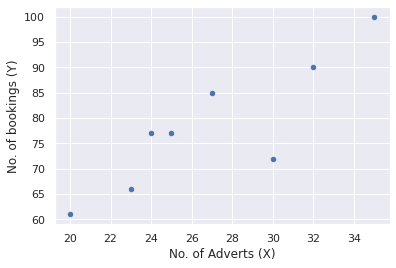

In [7]:


sns.set()
%matplotlib inline
df3.plot.scatter(x='No. of Adverts (X)', y='No. of bookings (Y)')



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


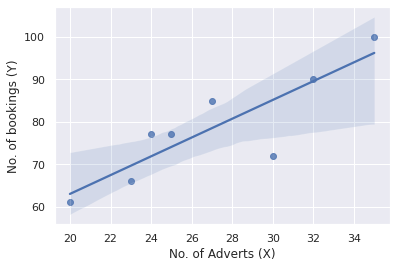

In [8]:
#df3.plot.scatter(x='No. of Adverts (X)', y='No. of bookings (Y)')
sns.regplot('No. of Adverts (X)', # Horizontal axis
           'No. of bookings (Y)', # Vertical axis
           data=df3)

In [9]:
x=df3['No. of Adverts (X)'].to_numpy().reshape((-1, 1))
y=df3['No. of bookings (Y)'].to_numpy().reshape((-1, 1))

In [10]:
model =LinearRegression().fit(x,y)

r_sq = model.score(x, y)
y_pred=model.predict(x)
df3['error']=y-y_pred

print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficent:', model.coef_)



coefficient of determination: 0.7541051880057117
intercept: [18.67045455]
coefficent: [[2.21590909]]


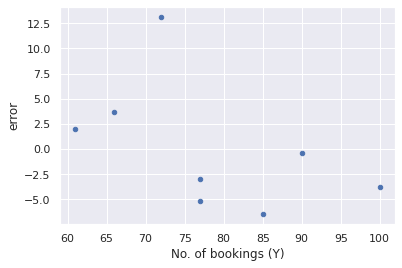

In [11]:
df3['error']=y_pred-y
#print(df3)
sns.set()
%matplotlib inline
df3.plot.scatter(x='No. of bookings (Y)', y='error')

In [13]:
df4=df3
df4=df4.rename(columns={"No. of bookings (Y)":"Y","No. of Adverts (X)":"X"})
formula_str="Y~X"
print(df4)
result=sm.ols(formula=formula_str,data=df4).fit()
print(result.summary())


   Month   X    Y      error
0      1  20   61   1.988636
1      2  24   77  -5.147727
2      3  30   72  13.147727
3      4  23   66   3.636364
4      5  27   85  -6.500000
5      6  25   77  -2.931818
6      7  32   90  -0.420455
7      8  35  100  -3.772727
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     18.40
Date:                Fri, 03 Feb 2023   Prob (F-statistic):            0.00515
Time:                        16:27:50   Log-Likelihood:                -25.598
No. Observations:                   8   AIC:                             55.20
Df Residuals:                       6   BIC:                             55.36
Df Model:                           1                                         
Covariance Type:            

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [14]:
formula_str="Y~0+X"
print(df4)
result=sm.ols(formula=formula_str,data=df4).fit()
print(result.summary())

   Month   X    Y      error
0      1  20   61   1.988636
1      2  24   77  -5.147727
2      3  30   72  13.147727
3      4  23   66   3.636364
4      5  27   85  -6.500000
5      6  25   77  -2.931818
6      7  32   90  -0.420455
7      8  35  100  -3.772727
                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              964.4
Date:                Fri, 03 Feb 2023   Prob (F-statistic):                    9.27e-09
Time:                        16:29:24   Log-Likelihood:                         -26.617
No. Observations:                   8   AIC:                                      55.23
Df Residuals:                       7   BIC:                                      55.31
Df Model:                          

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
